**<h2>Introduction</h2>**

We are all interested in movies. When we checked out the project file, we thought that we could have build up some relationships between the variables. Thus, we could have formed a hypothesis and test that hypothesis throughout the project.

**<h2>Problem Definition</h2>**

We wanted to make two seperate machine learning models which would enable us to find out how do the votes affect revenue and how does rating and votes affect the metascore.

**<h2>Utilized Datasets</h2>**

At the beginning, we used the dataset which our professor has shared with us and also we have found this data in movielens(https://grouplens.org/datasets/movielens/100k/). To urther investigate the dataset, we used .describe() method on the data set. We had 993 rows. We have found the mean, standard deviation, minimum value, maximum value and percentiles of every single data.

**<h2>Data Exploration</h2>**

As the first step, we checked the correlation between rating and metascore. Thus, we have seen that as the rating increases, metascore also increases. As the second step, we have found the mean revenue of every single genre. The highest revenue was held by animation movies and the lowest revenue was held by horror. Than, we searched the number of movies for each genre. Highest number belonged to darama movies and the smallest number belonged to western movies. Lastly, we checked the actors and actresses who acted in at least 5 movies and we displayed how many movies they have played in.

In [68]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [70]:
filename = 'IMDB-Movie-Data-withID.csv'
df = pd.read_csv(join(path_prefix, filename), index_col=0)

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2015381,112852.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1446714,94864.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,4972582,166534.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3470600,167036.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1386697,135536.0


In [71]:
# Clean NaN values
df = df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2015381,112852.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1446714,94864.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,4972582,166534.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3470600,167036.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1386697,135536.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,2034800,166918.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,3783958,164909.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,1212428,169900.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,1355644,166635.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,3183660,135143.0


In [ ]:
#Statistics about the dataset
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
count,832.000000,832.000000,832.000000,832.000000,8.320000e+02,832.000000,832.000000,8.320000e+02,832.000000
mean,484.957933,2012.507212,114.671875,6.818510,1.938521e+05,85.053185,59.557692,1.907665e+06,109660.399038
std,286.310392,3.177455,18.500965,0.868859,1.935994e+05,104.733721,16.973939,1.227028e+06,37400.269846
min,1.000000,2006.000000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,2.066340e+05,44193.000000
25%,237.750000,2010.000000,101.000000,6.300000,6.163350e+04,14.092500,47.000000,1.022092e+06,80438.000000
50%,475.500000,2013.000000,112.000000,6.900000,1.371600e+05,49.710000,60.000000,1.621957e+06,106739.000000
75%,728.250000,2015.000000,124.000000,7.500000,2.724448e+05,117.237500,72.000000,2.513564e+06,141878.500000
max,1000.000000,2016.000000,187.000000,9.000000,1.791916e+06,936.630000,100.000000,7.371706e+06,175671.000000


Mounted at ./drive


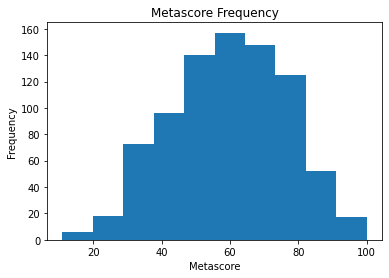

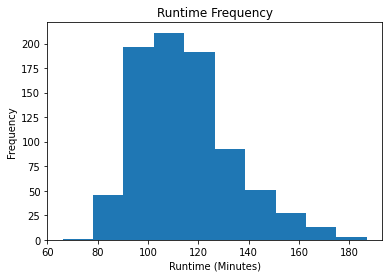

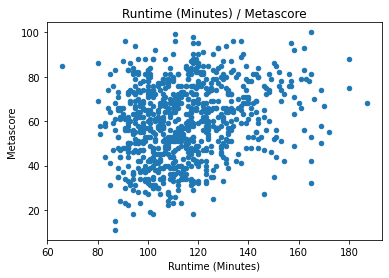

In [ ]:
# Libraries
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

# Google drive
from google.colab import drive
drive.mount('./drive', force_remount=True)

# File path
path_prefix = './drive/My Drive'
fileName = 'IMDB-Movie-Data-withID.csv'
df = pd.read_csv(join(path_prefix, fileName))

# Clean NaN values
df.dropna(subset= ['Revenue (Millions)', 'Metascore'], inplace= True)
# Rows and cols after cleaning
df.shape

df[['Runtime (Minutes)', 'Metascore']]

ax = df['Metascore'].plot.hist()

ax.set_title('Metascore Frequency')
ax.set_xlabel('Metascore')
plt.show()

ax = df['Runtime (Minutes)'].plot.hist()

ax.set_title('Runtime Frequency')
ax.set_xlabel('Runtime (Minutes)')
plt.show()

ax = df[['Runtime (Minutes)', 'Metascore']].plot.scatter(x='Runtime (Minutes)', y='Metascore', s=20)
ax.set_title('Runtime (Minutes) / Metascore')
plt.show()


1. is the number of repeations of the metascore.
2. is the number of repeations of the runtime.
3. is the graph of runtime divided by metascore which shows that as movies gets longer the metascore rises.


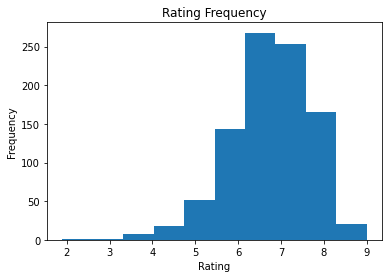

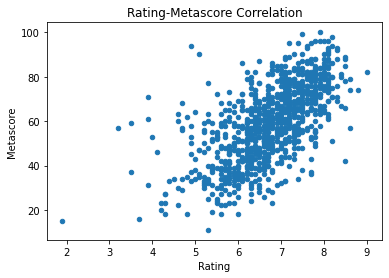

In [ ]:
fname = "IMDB-Movie-Data-withID.csv"
df = pd.read_csv(join(path_prefix, fname))
df.dropna(subset = ["Rating"], inplace=True)
df.dropna(subset = ["Metascore"], inplace=True)
df[['Rating', 'Metascore']]



# histogram of the age column
# we first extract the column as a series object 
# and then call the plot.hist function
ax = df['Rating'].plot.hist()

# since it returns an Axes object
# we can change the inner elements
ax.set_title('Rating Frequency')
ax.set_xlabel('Rating')
plt.show()

# depending on the chart type
# you can also specify the attributes
# to be assigned on the axes
ax = df[['Rating', 'Metascore']].plot.scatter(x='Rating', y='Metascore', s=20)  # s-> marker size
ax.set_title('Rating-Metascore Correlation')
plt.show()


1. is the number of repeations of the rating.
2. is the graph of rating metascore correlation which shows great correlation since both rating and metascore used for grading the movie.

            0           0
0      Action  127.963636
1   Adventure  157.768313
2   Animation  192.359556
3   Biography   59.734697
4      Comedy   77.319798
5       Crime   64.093840
6       Drama   51.068530
7     Fantasy  134.411429
8      Horror   37.406897
9      Sci-Fi  138.708585
10   Thriller   71.153537
11  Biography   59.734697
12     Family  124.141667
13    Mystery   54.464070
14    Romance   43.043109
15    Western  117.457500
16      Sport   67.076667
17        War   53.433000
18      Music   55.713000
19    Musical   81.642000


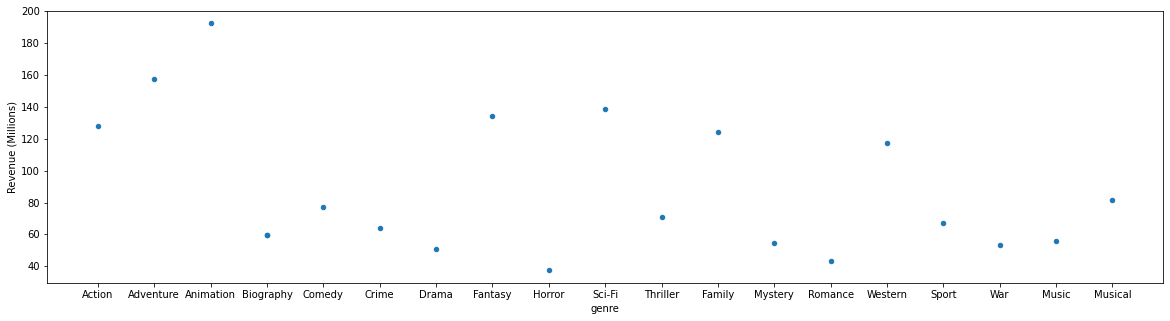

In [35]:
fname = "IMDB-Movie-Data-withID.csv"
df = pd.read_csv(join(path_prefix, fname))
df=df.dropna()
genres=['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Horror','Sci-Fi','Thriller','Biography','Family','Mystery','Romance','Western','Sport','War','Music','Musical']
num=[]
for i in genres:
    metasum=0
    counter=0
    df1 = df[df['Genre'].str.contains(i)]
    for m in df1['Revenue (Millions)']:
        metasum=m+metasum
        counter=counter+1
        if(counter==df1.shape[0]):
            metasum=metasum/counter
            num.append(metasum)            
num_frame = pd.DataFrame(num)     
genres_frame = pd.DataFrame(genres) 
result = pd.concat([genres_frame, num_frame], axis=1)
print(result)
result.columns =['genre', 'Revenue (Millions)']
result.plot(x ='genre', y='Revenue (Millions)', kind = 'scatter',)
plt.rcParams["figure.figsize"] = (25,5)
plt.show()

this a scatter plot that shows the mean of each genres average revenue

In [ ]:
# Number of movies of each genre
all_nonunique_genres = []
for i in df['Genre']:
  split_v = i.split(',')
  for j in split_v:
    all_nonunique_genres.append(j)

genre_counts = {i:all_nonunique_genres.count(i) for i in all_nonunique_genres}
print(genre_counts)

{'Action': 275, 'Adventure': 243, 'Sci-Fi': 106, 'Mystery': 86, 'Horror': 87, 'Thriller': 147, 'Animation': 45, 'Comedy': 248, 'Family': 48, 'Fantasy': 91, 'Drama': 415, 'Music': 15, 'Biography': 66, 'Romance': 119, 'History': 24, 'Western': 4, 'Crime': 125, 'War': 10, 'Musical': 5, 'Sport': 15}


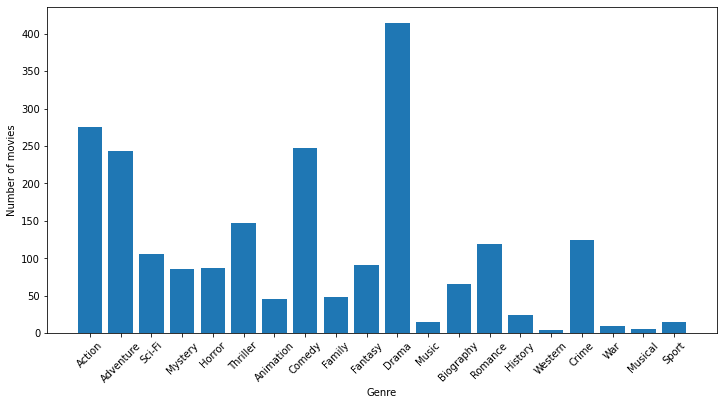

In [ ]:
# Bar graph of genres
data = genre_counts
genres = list(data.keys())
numbers = list(data.values())

plt.figure(figsize=(12,6))
plt.bar(range(len(data)), numbers, tick_label=genres)
plt.xticks(rotation=45)
plt.xlabel("Genre") 
plt.ylabel("Number of movies")
plt.show()

this a scatter plot that shows the number of movies filmed by each genres 

In [ ]:
# Number of movies of each actor
all_nonunique_actors = []

for i in df['Actors']:
  split_v = i.split(',')
  for j in split_v:
    all_nonunique_actors.append(j)

actor_counts = {i:all_nonunique_actors.count(i) for i in all_nonunique_actors}
print(actor_counts)

{'Chris Pratt': 3, ' Vin Diesel': 1, ' Bradley Cooper': 7, ' Zoe Saldana': 5, 'Noomi Rapace': 1, ' Logan Marshall-Green': 1, ' Michael Fassbender': 5, ' Charlize Theron': 6, 'James McAvoy': 4, ' Anya Taylor-Joy': 2, ' Haley Lu Richardson': 2, ' Jessica Sula': 1, 'Matthew McConaughey': 8, 'Reese Witherspoon': 3, ' Seth MacFarlane': 3, ' Scarlett Johansson': 7, 'Will Smith': 8, ' Jared Leto': 2, ' Margot Robbie': 3, ' Viola Davis': 6, 'Matt Damon': 5, ' Tian Jing': 1, ' Willem Dafoe': 4, ' Andy Lau': 1, 'Ryan Gosling': 5, ' Emma Stone': 7, ' Rosemarie DeWitt': 1, ' J.K. Simmons': 5, 'Charlie Hunnam': 1, ' Robert Pattinson': 5, ' Sienna Miller': 5, ' Tom Holland': 2, 'Jennifer Lawrence': 7, ' Chris Pratt': 3, ' Michael Sheen': 3, 'Laurence Fishburne': 1, 'Eddie Redmayne': 4, ' Katherine Waterston': 1, ' Alison Sudol': 1, 'Dan Fogler': 1, 'Taraji P. Henson': 1, ' Octavia Spencer': 2, ' Janelle Monáe': 1, 'Kevin Costner': 4, 'Felicity Jones': 1, ' Diego Luna': 2, ' Alan Tudyk': 1, ' Donnie 

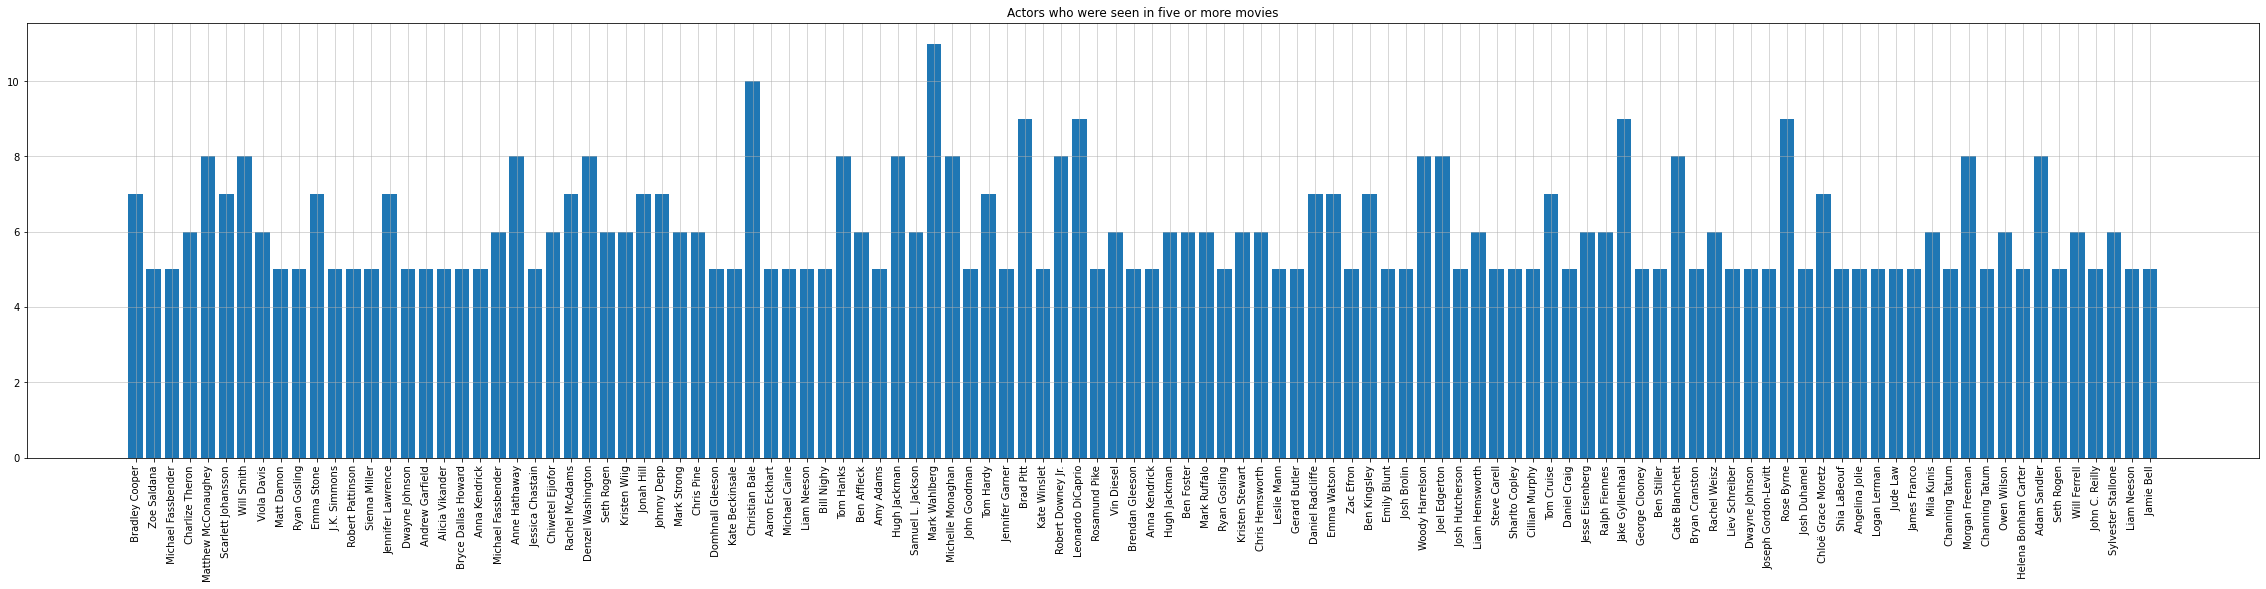

In [ ]:
actors = []
numbers = []

for item in actor_counts.keys():
  if actor_counts[item] >= 5:
    actors.append(item)
    numbers.append(actor_counts[item])

#i = 0
#while i < len(actors):
#  print(actors[i], numbers[i])
#  i+= 1

plt.figure(figsize=(40,8))
plt.bar(range(len(actors)), numbers, tick_label=actors)
plt.xticks(rotation=90)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Actors who were seen in five or more movies')
plt.show()

this is a plot of actors who have played in 5 and more movies.

**<h2>Machine Learning Model</h2>**

**Implementation**

In [72]:
from sklearn.model_selection import train_test_split
target = df['Revenue (Millions)']
b = df.drop(columns=['Revenue (Millions)','Genre','Title','Rank','Director','Actors','Year','imdbID','movieLensID','Description','Runtime (Minutes)','Rating','Metascore'],axis=0)
X_train, X_test, y_train, y_test = train_test_split(b,target,test_size=0.30, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=0)
print(X_train.shape,X_test.shape,X_val.shape)

(582, 1) (125, 1) (125, 1)


In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

Random Forest Regression - Votes vs Revenue

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
nEst_meta_parameter_tunes = [50,100,150,200]
rmse_val2 = []
for i in range(len(nEst_meta_parameter_tunes)):
  regressor = RandomForestRegressor(n_estimators=nEst_meta_parameter_tunes[i], random_state=42)
  regressor.fit(X_train, y_train)
  pred=regressor.predict(X_val) #make prediction on test set
  error = sqrt(mean_squared_error(y_val,pred)) #calculate rmse
  rmse_val2.append(error) #store rmse values
  print('RMSE value when n_estimators=' , nEst_meta_parameter_tunes[i] , 'is:', error)
  

RMSE value when n_estimators= 50 is: 88.67870928053925
RMSE value when n_estimators= 100 is: 88.71481359707273
RMSE value when n_estimators= 150 is: 88.53664497235562
RMSE value when n_estimators= 200 is: 88.49590774300448


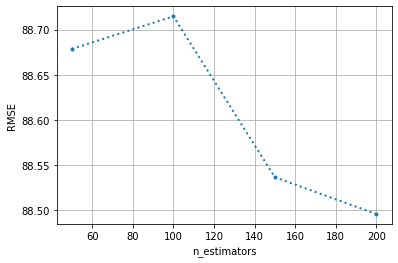

In [75]:
x=[50,100,150,200]
y=rmse_val2
plt.plot(x,y,ls=('dotted'))
plt.rc('lines', linewidth=2, linestyle='-', marker='.')
plt.grid(linestyle='-')
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.show()

Try regression model on test data with best hyper-parameters.

In [76]:
regressor = RandomForestRegressor(n_estimators=200, random_state=42)
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred))
pred=regressor.predict(X_test) #make prediction on test set
print("Root mean squared error on test data is:",error)


Root mean squared error on test data is: 125.47941306002276


k-NN Regression model - Rating,Votes vs Metascore

In [77]:
df = df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

In [78]:
from sklearn.model_selection import train_test_split
target = df.drop(columns=['Genre','Title','Rank','Director','Actors','Year','imdbID','movieLensID','Description','Votes','Rating','Runtime (Minutes)','Revenue (Millions)'],axis=0)
b = df.drop(columns=['Genre','Title','Rank','Director','Actors','Year','imdbID','movieLensID','Description','Metascore','Revenue (Millions)','Runtime (Minutes)'],axis=0)
X_train, X_test, y_train, y_test = train_test_split(b,target,test_size=0.30, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=0)
print(X_train.shape,X_test.shape,X_val.shape)

(582, 2) (125, 2) (125, 2)


In [79]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(6): #to hyper-parameter tuning
  K = K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K)

  model.fit(X_train, y_train)  #fit the model
  pred=model.predict(X_val) #make prediction on test set
  error = sqrt(mean_squared_error(y_val,pred)) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSE value for k=' , K , 'is:', error)

RMSE value for k= 1 is: 21.671917312503755
RMSE value for k= 2 is: 17.08882675902591
RMSE value for k= 3 is: 16.661092401160253
RMSE value for k= 4 is: 16.145711504916715
RMSE value for k= 5 is: 15.693382044670932
RMSE value for k= 6 is: 15.564817877365464


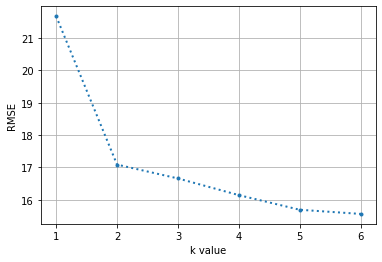

In [80]:
x=[1,2,3,4,5,6]
y=rmse_val
plt.plot(x,y,ls=('dotted'))
plt.rc('lines', linewidth=2, linestyle='-', marker='.')
plt.grid(linestyle='-')
plt.xlabel("k value")
plt.ylabel("RMSE")
plt.show()

k-NN model evaluation on Test set

In [81]:
regressor = neighbors.KNeighborsRegressor(n_neighbors = 6)
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred))
pred=regressor.predict(X_test) #make prediction on test set
print("Root mean squared error on test data is:",error)

Root mean squared error on test data is: 16.469014677400846


**<h2>Results & Discussion </h2>**

According to data exploration we decided to build 2 regression models which are Random Forest Regression model and k-NN Regression model. In order to build models, we cleaned the data from NaN values. After that, dataset split into 3 parts train(development), validation and test datasets (70%, 15%, 15% respectively). In Random Forest Regression model we tried to create a model that predicts Revenue by training Votes feature. Also, we tuned 4 different n_estimators parameter values to find model has lowest RMSE. According to the results, our Random Forest Regression model that predicts Revenue by training Votes label is not usable because the correlation between Votes and Revenue is low. For example, there are too many incidences that movie has low rating gets high revenue. In second ML model which is k-NN Regression model we tried to build a model which predicts metascore of the movie by training the votes and ranking features. We tuned 6 different k values for k-NN regression model on validation data and we get 15.56 RMSE when k is 6. After that, we implemented k-NN regression model on test data with best k value and we get 16.46 RMSE. 

**<h2>Conclusion</h2>**

We aimed to build a model that can predict the metascore of movies by training rating and votes features. According to our results, our k-NN model is usable to prediction of metascore. Advantage of our model is model that we built is multi featured, so it trains two important feature of the movie and predicts the metascore which is general evaluation of quality of the movie. Disadvantage of the model is that error rate is not too low as we desired but it is related to data also. In the dataset which filled with more accurate data, our model can run more effectively.

**<h2>Future Work</h2>**

In the final, we want to create a machine learning model method which makes correct or close to the mark assumptions of metascore value.

**<h2>Work Division</h2>**

We divided the datasets to five. Than, every single member had to display a dataset as graphs. After displaying the graphs, we interpreted the data in terms of how do they effect MetaScore of the movies. For the future, were are planning to dive in our data and make much more in-depth analysis we are going to use that data in our machine learning model. We will do data cleaning, explatory data analysis, hypothesis testing and finally comparing the machine learning models to find the most accurate machine learning model. We will focus on every single step as the whole group and than we will proceed to the next step as a whole.